In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
scipy.__version__

'1.9.3'

In [3]:
pwd

'/Users/nealaggarwal/MIT'

In [4]:
cd wk2

/Users/nealaggarwal/MIT/wk2


In [7]:
debugging = pd.read_csv('debugging.csv')
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


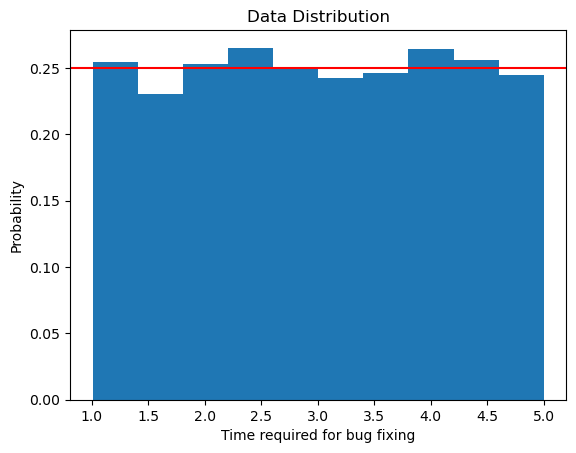

In [8]:
#visualize

plt.hist(debugging["Time Taken to fix the bug"], density=True)
plt.axhline(1 / 4, color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

/var/folders/8_/pn590l890g3_9kshr7t1jhjw0000gn/T/ipykernel_824/1128807700.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(debugging["Time Taken to fix the bug"])


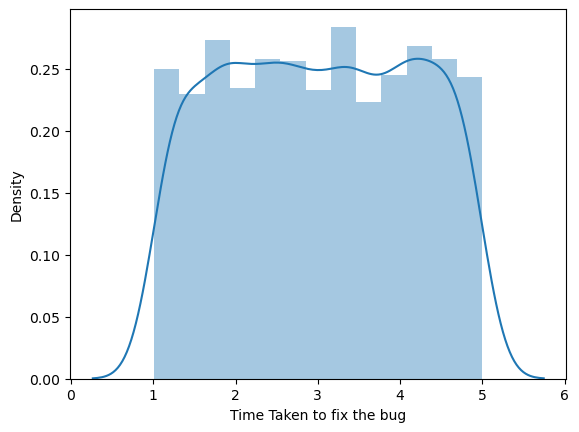

In [10]:
# Density plot

sns.distplot(debugging["Time Taken to fix the bug"])
plt.show()

In [11]:
# import required function
from scipy.stats import uniform

# use uniform.pmf() to generate prob dist
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4)

In [12]:
probs

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

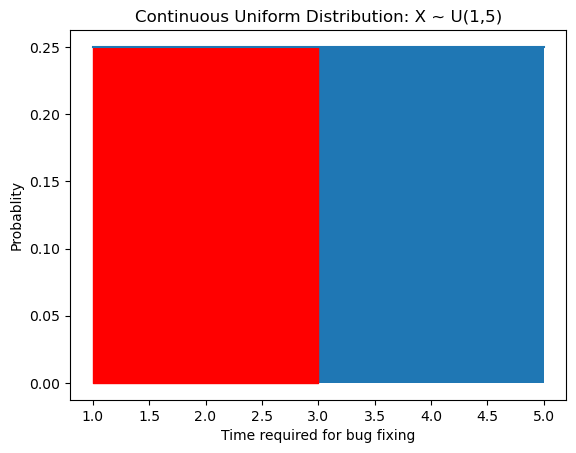

In [16]:
# plot the probaility distribution
# to visualize the calculations

x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probablity")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [14]:
plt.fill_between?

In [15]:
uniform.cdf(x=3, loc=1, scale=4)

0.5

# Normal Distribution

In [17]:
sat_score = pd.read_csv("sat_score.csv")

In [18]:
sat_score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


<AxesSubplot: >

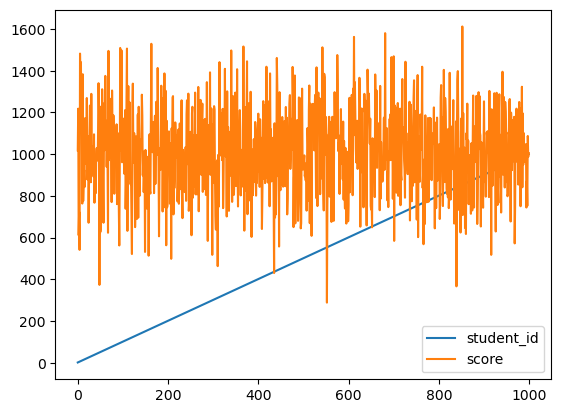

In [23]:
sat_score.plot()

<AxesSubplot: >

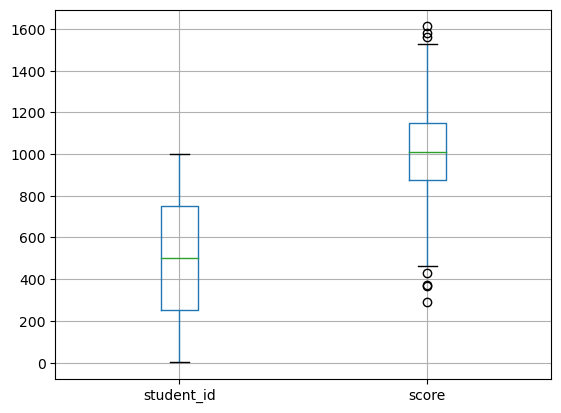

In [21]:
sat_score.boxplot()

In [25]:
from scipy.stats import norm

mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


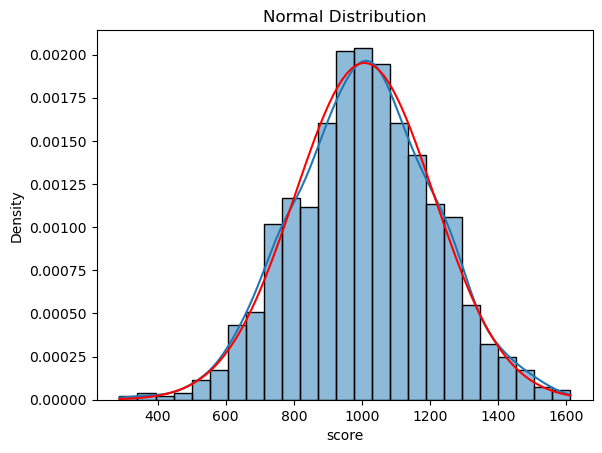

In [29]:
# calculate the pdf of SAT scores using norm.pdf()
density = pd.DataFrame()
density["x"] = np.linspace(
    sat_score["score"].min() - 0.01, sat_score["score"].max() + 0.01, 100)
density["pdf"] = norm.pdf(density["x"], mu, sigma)

fig, ax = plt.subplots()
# plot the distributin of data using a histogram
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density")
# plot the normal distribution
ax.plot(density["x"], density["pdf"], color="red")
plt.title("Normal Distribution")
plt.show()

In [46]:
density["x"]

0      287.990000
1      301.363939
2      314.737879
3      328.111818
4      341.485758
         ...     
95    1558.514242
96    1571.888182
97    1585.262121
98    1598.636061
99    1612.010000
Name: x, Length: 100, dtype: float64

In [30]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob_less_than_800 = norm.cdf(800, mu, sigma)
print("The probability that a student will score less than 800 is", round(prob_less_than_800, 4))

The probability that a student will score less than 800 is 0.1551


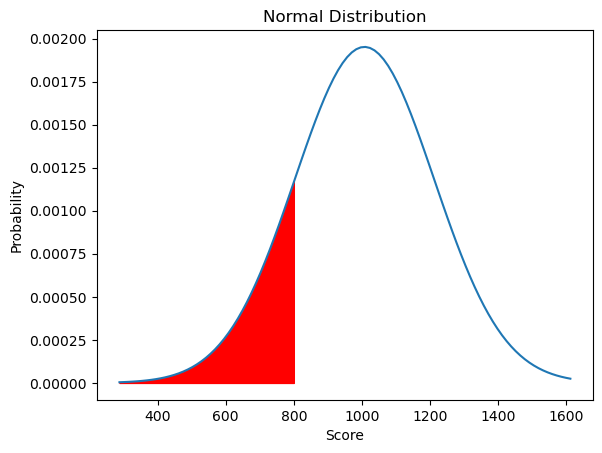

In [31]:
# plot this
plt.plot(density["x"], density["pdf"])
x1 = np.linspace(density["x"].min(), 800, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [47]:
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

The 90th percentile score should be 1269


In [53]:
# question 2 in the normal distribution lecture
prob_less_than_750 = norm.cdf(751, mu, sigma)
print("The probability that a student will score less than 750 is", round(prob_less_than_750, 4))

The probability that a student will score less than 750 is 0.1048


In [54]:
probability_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)
round(probability_greater_than_1300, 4)

0.0762

In [56]:
# calculate the 90th percentile score using ppf()
score_90th_percentile = norm.ppf(0.90, mu, sigma)
score_90th_percentile

1269.4424694794875

In [57]:
# calculate the 95th percentile score using ppf()
score_95th_percentile = norm.ppf(0.95, mu, sigma)
score_95th_percentile

1343.7108592761276

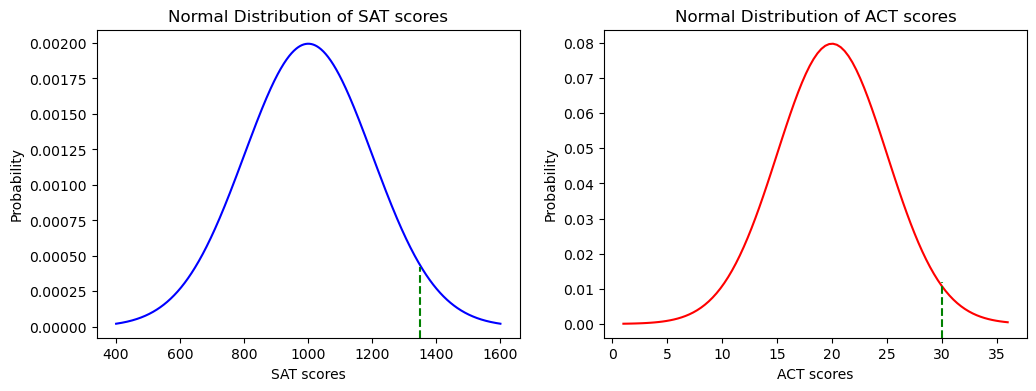

In [72]:
# plot the distribution for SAT and ACT scores

from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,4))
x = np.linspace(400, 1600, 1000)
ax1.plot(x, norm.pdf(x, loc = 1000, scale = 200), color = 'b')
ax1.set_title('Normal Distribution of SAT scores')
ax1.set_xlabel('SAT scores')
ax1.set_ylabel('Probability')
ax1.axvline(1350, ymax=0.23, linestyle='--', color='green')
x1 = np.linspace(1, 36, 100)
ax2.plot(x1, norm.pdf(x1, loc=20, scale=5), color='r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax=0.18, linestyle='--', color='green')
plt.show()

In [74]:
# Z-score on SAT
top_sat = (1350 - 1000) / 200
top_sat

1.75

In [76]:
# Z-score on ACT
top_act = (30 - 20) / 5
top_act

2.0

In [83]:
# Z-scores for question 1

physics = (56.88 - 47.5) / 12.3
history = (77.1 - 77) / 8.2
cs = (35.55 - 33) / 7.3

print('Physics:', round(physics,2))
print('History', round(history,2))
print('cs', round(cs,2))

Physics: 0.76
History 0.01
cs 0.35


In [92]:
# salaries
# Z-scores of the two salary limits

lower = (59000 - 55000) / 6200
upper = (67000 - 55000) / 6200
print('lower', lower)
print('upper', upper)
print('range', (round(upper, 2)) - (round(lower,2)))

lower 0.6451612903225806
upper 1.935483870967742
range 1.29


In [93]:
import scipy.stats as stats
stats.norm.cdf(67000, loc=55000, scale=6200) - stats.norm.cdf(59000, loc=550000, scale=6200)

0.973534526985065

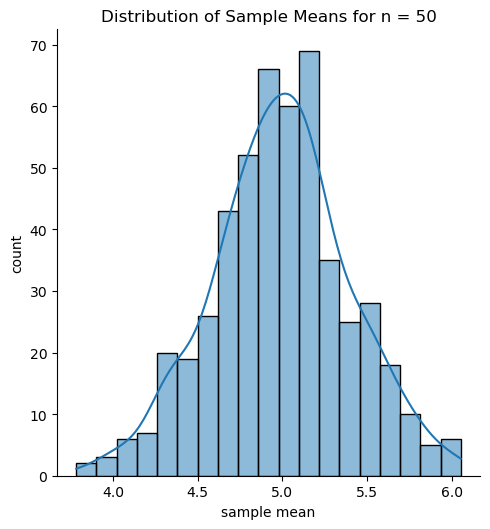

In [118]:
# import scipy uniform
from scipy.stats import uniform

# setting seed for random()
np.random.seed(1)
# set sample size to 5
n = 50
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    sample = np.random.choice(uniform_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
# cplost the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()